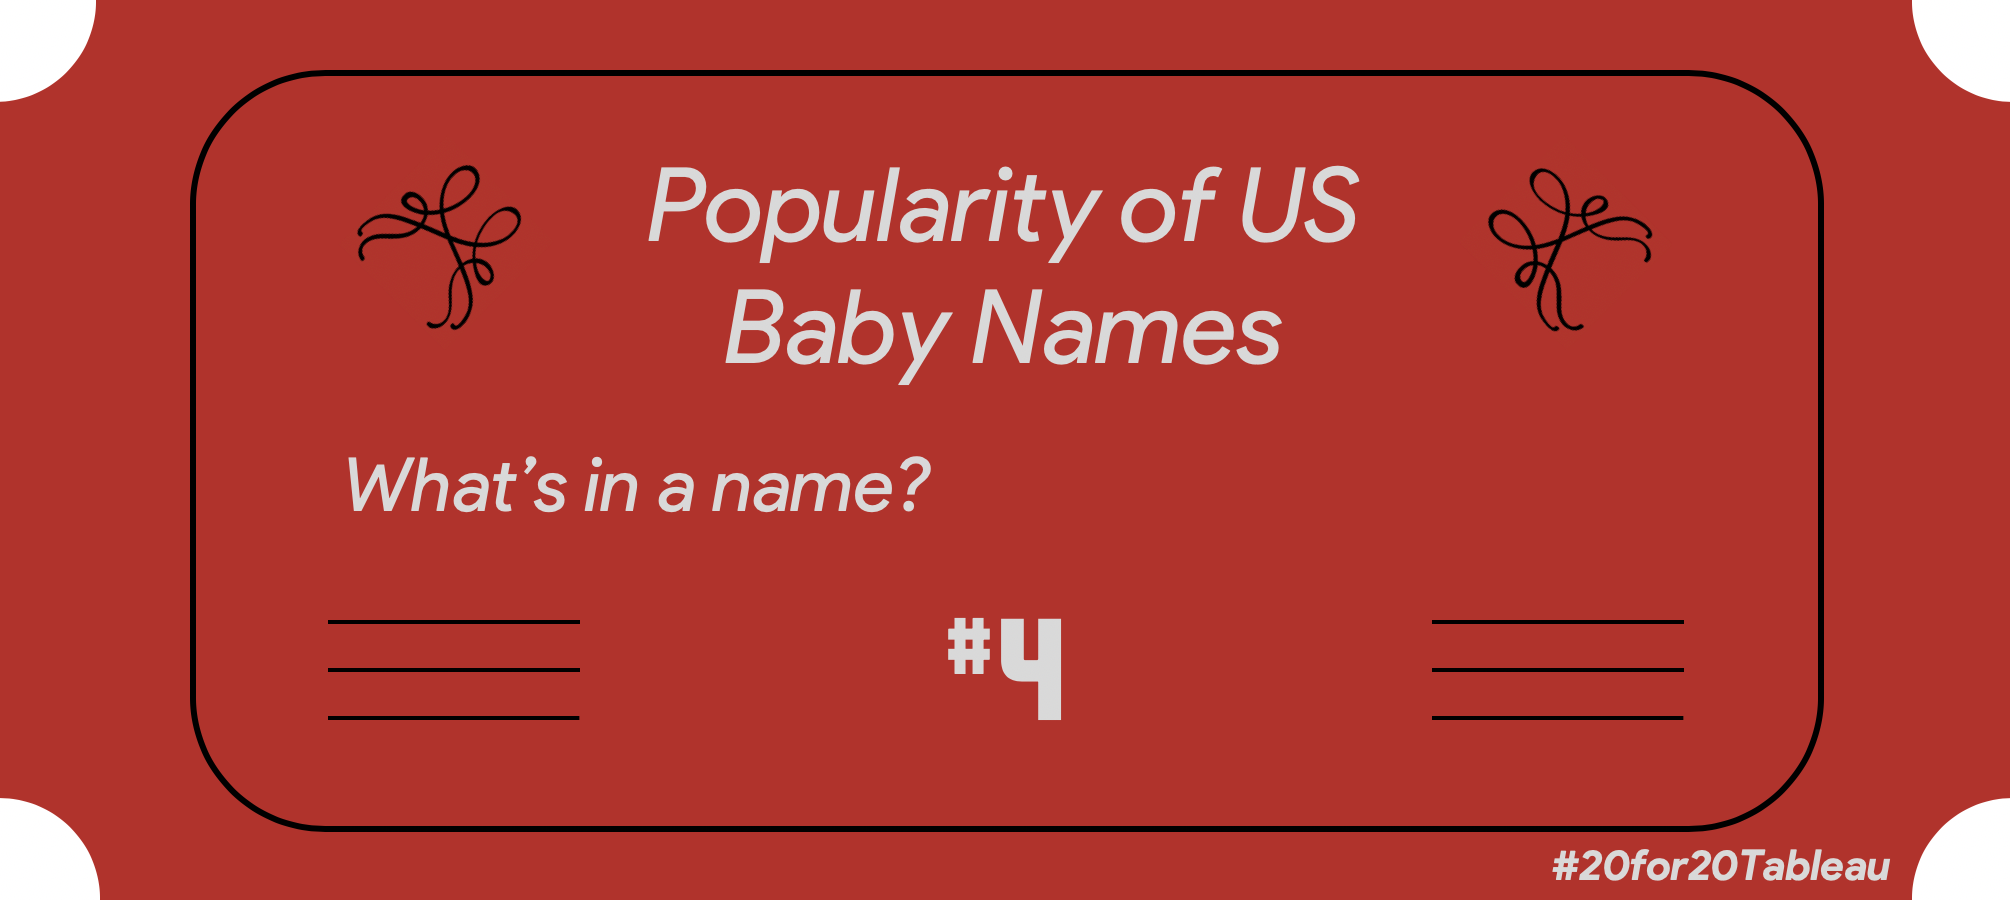

### The SAS Popular Baby Names dataset provided by SAS USA contains the top 1000 male and female baby names for each year from 1880 to the present in the United States. The dataset includes the number of occurrences for each name, and is based on Social Security card applications for births. This dataset is useful for researchers, analysts, and individuals interested in tracking name trends and popularity over time.

Text(0, 0.5, 'Births 1.0 = 1 Million')

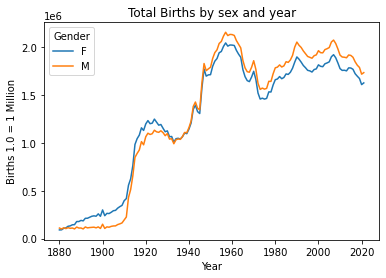

In [1]:
import pandas as pd
import numpy as np
from io import BytesIO
import zipfile
zf = zipfile.ZipFile("names.zip", "r")
final_df = pd.DataFrame(columns = ['Name', 'Gender', 'Births', 'Year'])
for i in zf.infolist():
    if(i.filename.endswith('txt')):
        year = i.filename[3:7]
        df = pd.read_csv(BytesIO(zf.read(i.filename)),names = ['Name','Gender', 'Births', 'Year'], encoding='utf-8', engine='python', header=None)
        df['Year'] = int(year)
        final_df = pd.concat([final_df, df])
final_df = final_df.reset_index(drop=True)
total_births = final_df.pivot_table('Births', index='Year', columns='Gender', aggfunc=sum)
ax = total_births.plot(title='Total Births by sex and year')
ax.set_ylabel("Births 1.0 = 1 Million")

## Sorting the most popular names In the dataset 

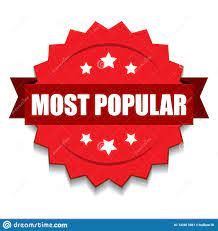

In [2]:
#Useing A sort_values function to take out the most used name during birth
sort_by_name = final_df.sort_values(['Births'], ascending = False)
sort_by_name

,Name,Gender,Births,Year
431064,Linda,F,99693,1947
441435,Linda,F,96212,1948
437168,James,M,94762,1947
544671,Michael,M,92723,1957
437169,Robert,M,91651,1947
...,...,...,...,...
1349751,Momoka,F,5,2000
1349750,Mollyann,F,5,2000
1349749,Molleigh,F,5,2000
1349748,Moises,F,5,2000


In [3]:
#Doing a group by Name and total birth by that name 
sort_by_name.groupby('Name')['Births'].sum().sort_values(ascending=False).head(20)

Name
James          5226309
John           5172233
Robert         4854199
Michael        4414507
William        4172145
Mary           4147669
David          3659839
Joseph         2650083
Richard        2580610
Charles        2424044
Thomas         2340278
Christopher    2058380
Daniel         1956580
Elizabeth      1666227
Matthew        1631157
Patricia       1577758
George         1486086
Jennifer       1474216
Anthony        1469628
Linda          1457512
Name: Births, dtype: object

### Lets import the visualiztion library 

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
data = sort_by_name.groupby('Name')['Births'].sum().sort_values(ascending=False).head(20)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


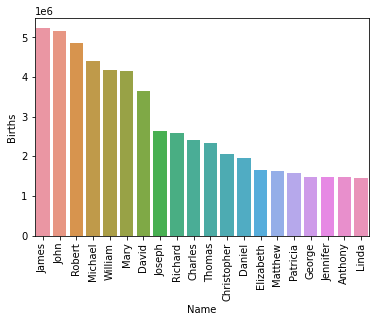

<Figure size 1080x720 with 0 Axes>

In [6]:
sns.barplot(data.index,data[0:20])
plt.xticks(rotation=90)
plt.figure(figsize=(15,10))
plt.show()

## Conclusion
### We can see that top 20 most popular name in the dataset, James , John are most popular Male name , Where as Mary , Elizabeth beign the most popular female name

In [7]:
print('-----'*50)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Text(0.5, 1.0, 'Female vs Male')

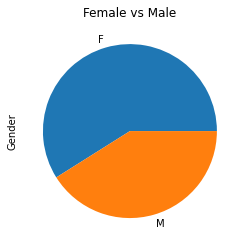

In [8]:
final_df['Gender'].value_counts().plot(kind='pie')
plt.title('Female vs Male')

### The pie chart show the distribution of gender in The gender columns of the dataset , This chart does not conclude that we have more female in our dataset population , But Female names are more diverse that male child. 

In [9]:
print('-----'*50)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


   <h1 style="color:RED">TOP 20 NAME FREQUENCY TABLE THROUGHOUT THE YEARS</h1>

In [10]:
linda = (final_df[['Name','Births','Year']][final_df['Name']=='Linda']).sort_values(['Births'],ascending=False)

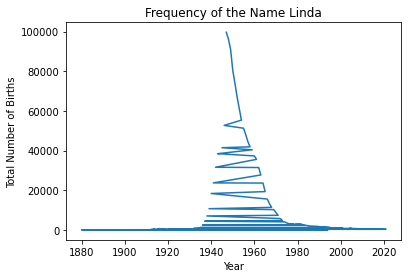

In [11]:
plt.plot(linda['Year'],linda['Births'])
plt.title('Frequency of the Name Linda')
plt.xlabel('Year')
plt.ylabel('Total Number of Births')
plt.show()

<BarContainer object of 206 artists>

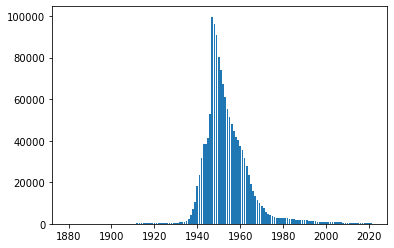

In [12]:
plt.bar(linda['Year'],linda['Births'])

### Hear I have made frequency table for name LINDA and we can see that it have a peak between 1940 to 1960. Same way its see the frequency for all the top names in the dataset using groupby fun and barplot

In [13]:
ind = list(data.index)

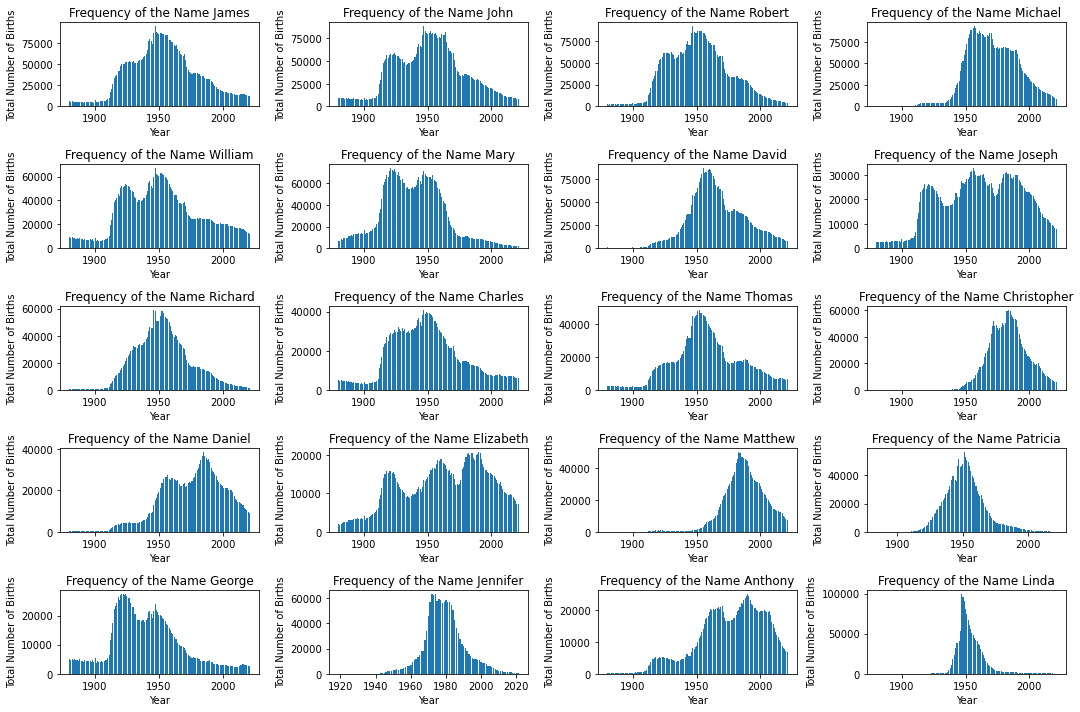

In [14]:
 
n_plots = len(ind)  

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 10))

for i, ax in enumerate(axes.flat):
    if i < n_plots:
        name_data = final_df[['Name', 'Births', 'Year']][final_df['Name'] == ind[i]].sort_values(['Births'], ascending=False)
        ax.bar(name_data['Year'], name_data['Births'])
        ax.set_title('Frequency of the Name ' + ind[i])
        ax.set_xlabel('Year')
        ax.set_ylabel('Total Number of Births')
    else:
        
        fig.delaxes(ax)

plt.tight_layout()
plt.show()


## Conclusion : We can see the Name frequency for the top 20 names , As we can see 
### 1)Name Joseph and Elizabeth have a very cosntant frequency throughout the years , 
### 2) Name like Anthony ,Daniel , Matthew are popular in recent year.
### 3) Name like Mary , William , Robert , John where popular in mid 90s


In [15]:
print('-----'*50)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


# <span style="color:Red">LEAST POPULAR NAME</span>


In [16]:
tail = sort_by_name.groupby('Name')['Births'].sum().sort_values(ascending=False).tail(20)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


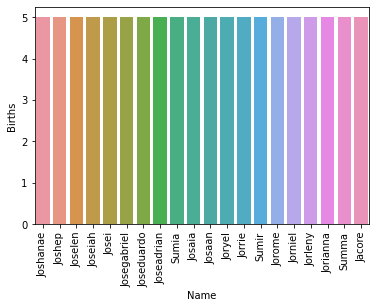

<Figure size 1080x720 with 0 Axes>

In [17]:
sns.barplot(tail.index,tail[0:20])
plt.xticks(rotation=90)
plt.figure(figsize=(15,10))
plt.show()

### Conclusion : The frequency of least popular name is 5 for last 20 names . We can say these are very unqiue names in dataset.

In [18]:
print('-----'*50)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


# <span style="color:Orange; font-size: 32px;">YEAR WISE BIRTH W.R.T GENDER</span>


In [19]:
years = list(final_df['Year'].unique())

In [20]:
year_1880 = (final_df[['Gender','Births','Year']][final_df['Year']==1880]).groupby(['Gender'])['Births'].sum()

In [21]:
year_1880

Gender
F     90994
M    110490
Name: Births, dtype: object

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


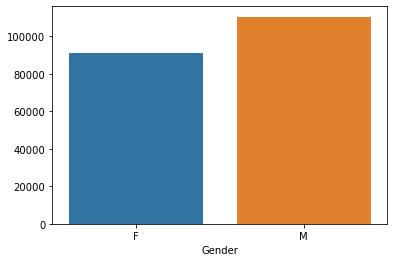

In [22]:
sns.barplot(year_1880.index,year_1880.values)
plt.show()

### I have plotted the birth distribution in Year 1880 , We can see there where more Male Birth in that year. 
### Same way I will plot for first 20 years and comapre it with last 20 Year .

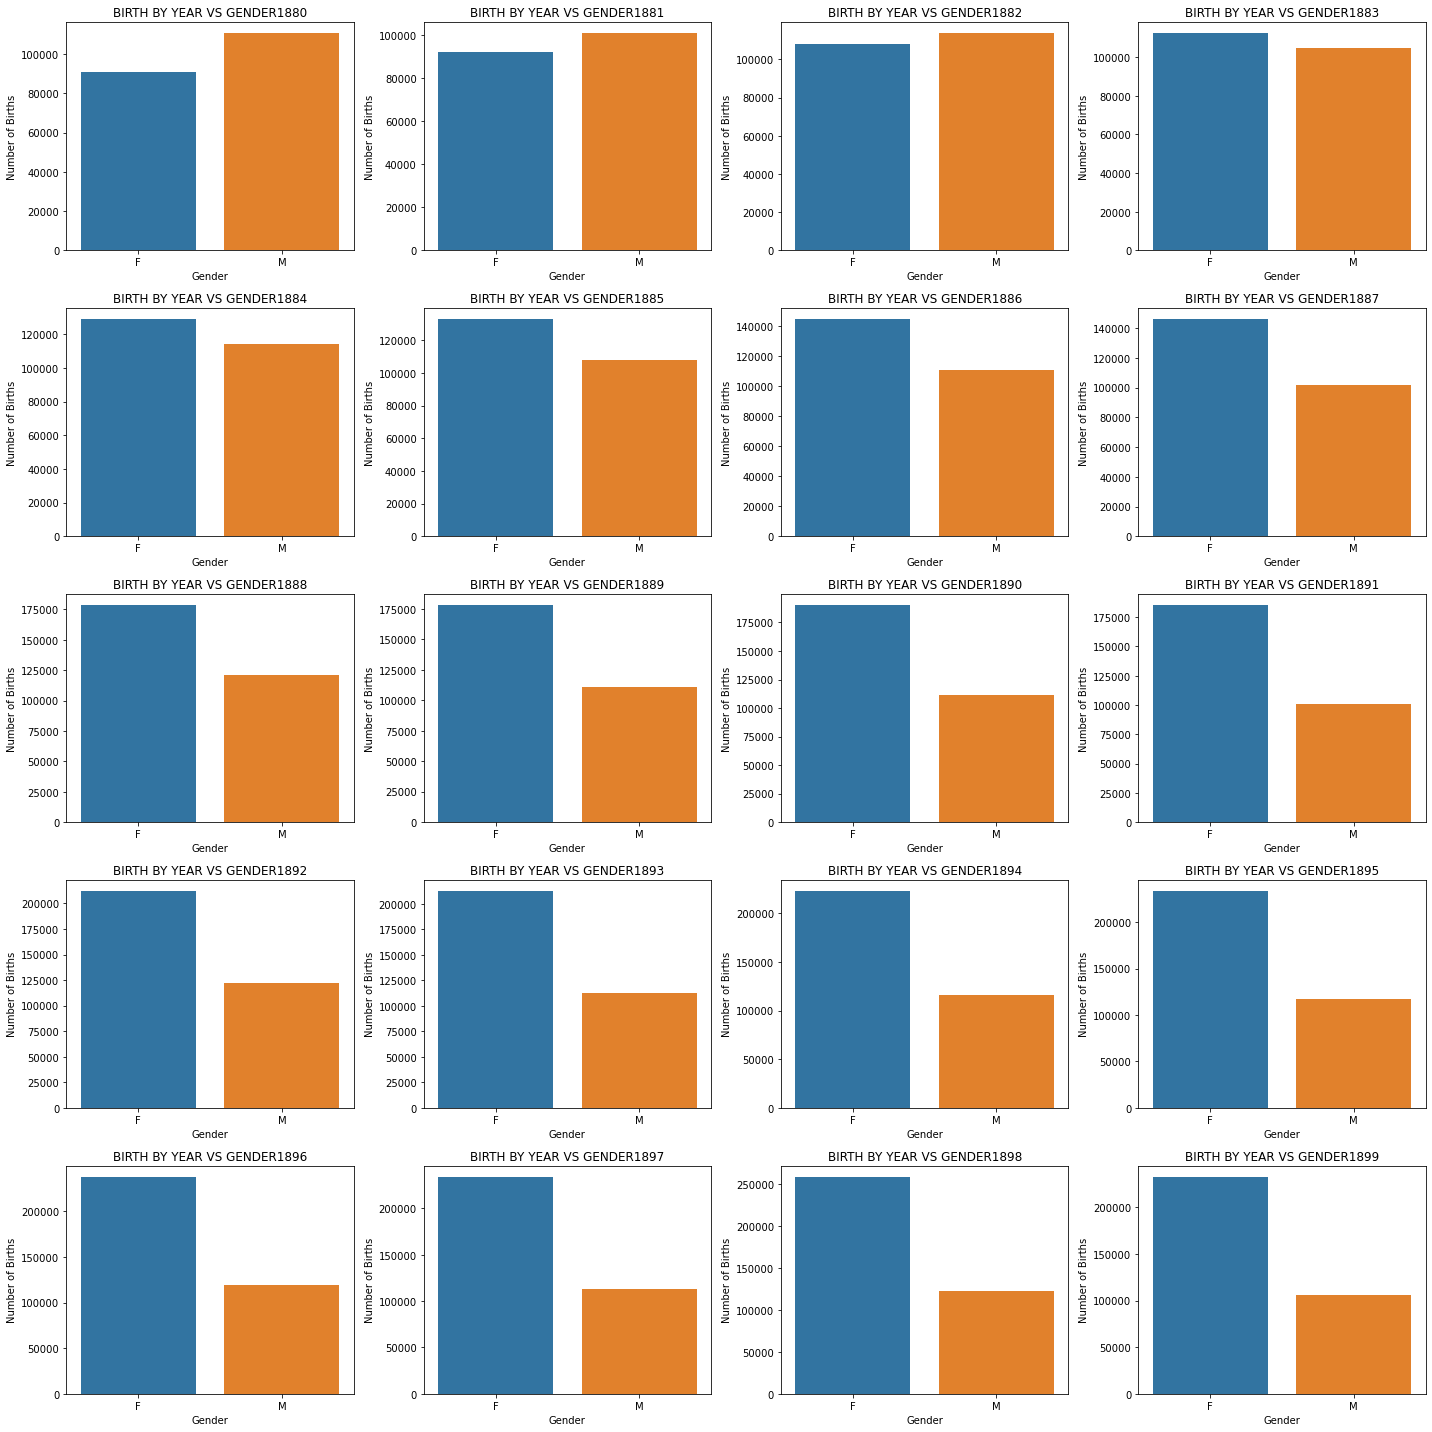

In [23]:
#import matplotlib.pyplot as plt
#import seaborn as sns

# Create a figure with 20 subplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))

# Flatten the axes array so we can iterate over it using a single loop
axes = axes.flatten()

# Loop over the first 20 years in the "years" list
for i, year in enumerate(years[:20]):
    # Get the total number of births by gender for the current year
    year_data = final_df.loc[final_df['Year'] == year, ['Gender', 'Births']].groupby('Gender')['Births'].sum()
    
    # Create a bar plot for the current year on the current subplot
    sns.barplot(x=year_data.index, y=year_data.values, ax=axes[i])
    axes[i].set_title('BIRTH BY YEAR VS GENDER'+str(year))
    axes[i].set_xlabel('Gender')
    axes[i].set_ylabel('Number of Births')
    
# Hide any unused subplots
for ax in axes[20:]:
    ax.axis('off')
    
# Adjust the layout and spacing of the subplots
plt.tight_layout()

# Show the plot
plt.show()


### We can see that there is gradually Increase in female birth from year 1883
### We can see that there is huge decline in Male births from 1888 that coutinue till 1900s show in graph 

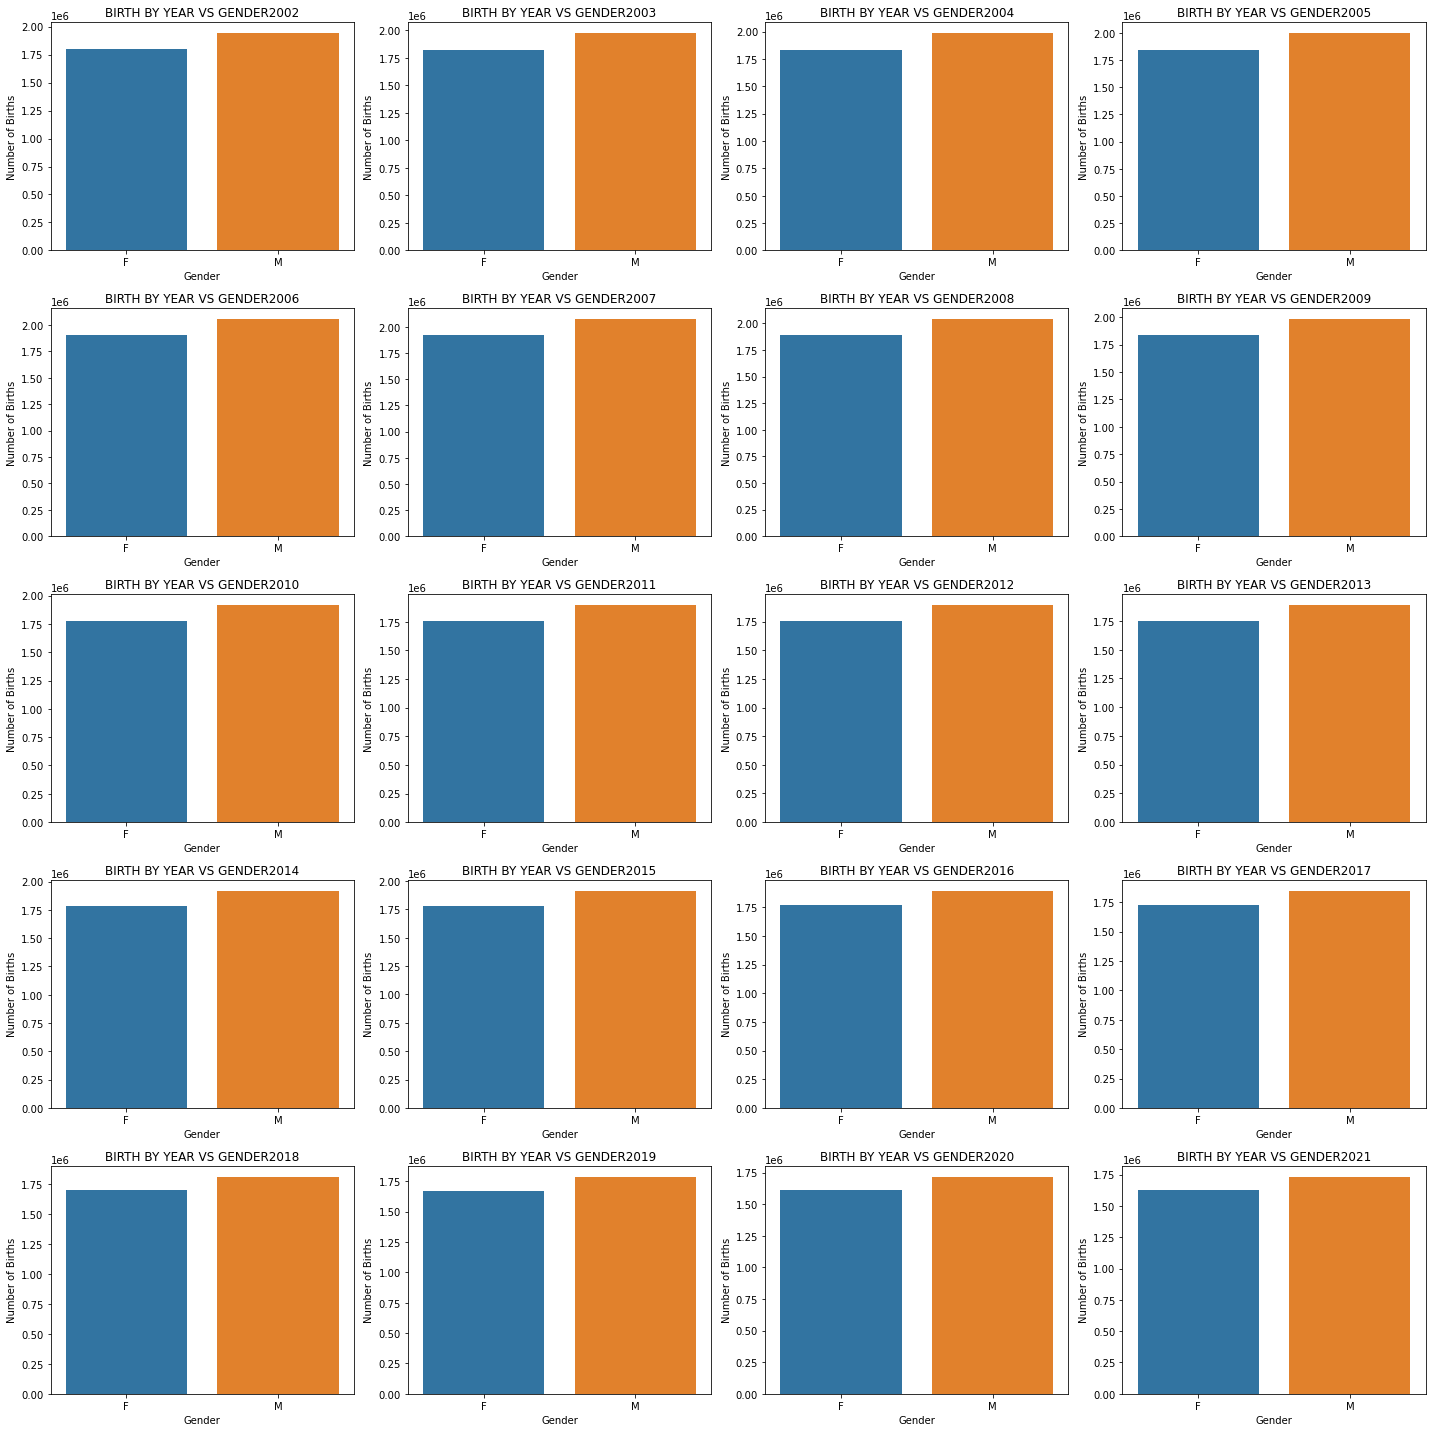

In [24]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))

# Flatten the axes array so we can iterate over it using a single loop
axes = axes.flatten()

# Loop over the first 20 years in the "years" list
for i, year in enumerate(years[-20:]):
    # Get the total number of births by gender for the current year
    year_data = final_df.loc[final_df['Year'] == year, ['Gender', 'Births']].groupby('Gender')['Births'].sum()
    
    # Create a bar plot for the current year on the current subplot
    sns.barplot(x=year_data.index, y=year_data.values, ax=axes[i])
    axes[i].set_title('BIRTH BY YEAR VS GENDER'+str(year))
    axes[i].set_xlabel('Gender')
    axes[i].set_ylabel('Number of Births')
    
# Hide any unused subplots
for ax in axes[20:]:
    ax.axis('off')
    
# Adjust the layout and spacing of the subplots
plt.tight_layout()

# Show the plot
plt.show()
 

### We can see the later year have quite a balance birth rate for both the Gender

In [25]:
print('-----'*50)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


# <span style="color:Green; font-size: 32px;">TOP 10 NAMES EVERY 10 YEARS</span>


In [26]:
top_name = (final_df[final_df['Year']==1880]).sort_values('Births',ascending=False).head(10)

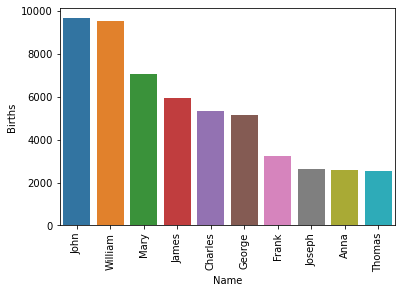

In [27]:
sns.barplot(x=top_name['Name'],y=top_name['Births'])
plt.xticks(rotation=90)
plt.show()

### Sample for the Year 1880 : John , William are quite popular male name , where as mary , anna are popular female name

In [28]:
year_ = list(final_df['Year'].unique())[::10]

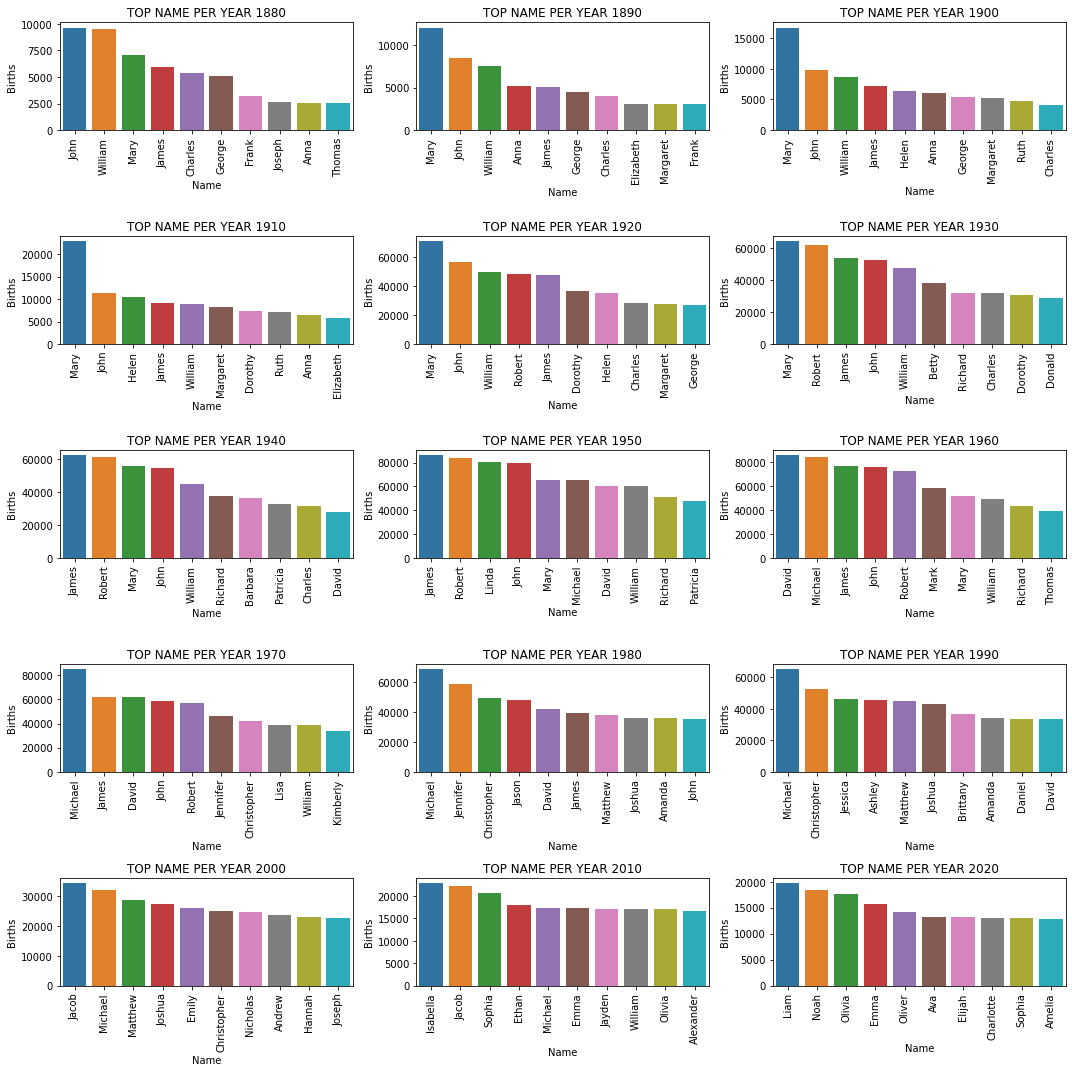

In [29]:
#import matplotlib.pyplot as plt
# seaborn as sns

# Define the years to plot
year_ = list(final_df['Year'].unique())[::10]
# Create a new figure and subplots
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))

# Flatten the subplots into a 1D array for easier indexing
axs = axs.flatten()

# Iterate over the years and plot the top names for each year in a corresponding subplot
for i, year in enumerate(year_):
    top_name = final_df[final_df['Year']==year].sort_values('Births', ascending=False).head(10)
    sns.barplot(ax=axs[i], x=top_name['Name'], y=top_name['Births'])
    axs[i].set_xticklabels(top_name['Name'], rotation=90)
    axs[i].set_title('TOP NAME PER YEAR ' + str(year))

# Hide the empty subplots
for i in range(len(year_), len(axs)):
    axs[i].axis('off')

# Adjust the spacing between subplots and show the figure
plt.tight_layout()
plt.show()


### Conclusion: 1) We can see IN 1880s and 1890s , John , William , Mary , Anna , George have been most popular names in USA. 
### 2)  In early 1900s to 1930s we can see the dominance of the Name Mary.
### 3) Comman names during the 19th centurys are Michael,James,Mary,William,John,Robert.
### 4) In late 1990s century name like Michael, Christopher,Jennifer,David,Matthew where quite popular.
### 5) Some more popular name in 90s century are Margaret,Dorothy,Patricia
### 6) In 21st century popular names are Jacob,Michael,Sophia,Noah

In [30]:
print('-----'*50)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


# <span style="color:RED; font-size: 32px;">MOST POPULAR LETTER FOR NAME</span>


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


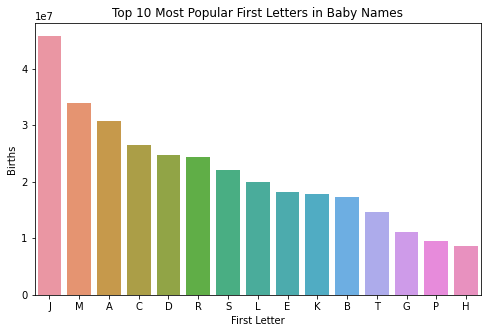

In [31]:
final_df["first_letter"] = final_df["Name"].str[0]

#Group the DataFrame by first letter and aggregate the counts
counts = final_df.groupby("first_letter")["Births"].sum().reset_index()

counts = counts.sort_values("Births", ascending=False)

# Create a bar chart of the top 10 most popular first letters
top_counts = counts.head(15)
plt.figure(figsize=(8,5))
sns.barplot(top_counts["first_letter"], top_counts["Births"])
plt.title("Top 10 Most Popular First Letters in Baby Names")
plt.xlabel("First Letter")
plt.ylabel("Births")
plt.show()

### WE CAN SEE THE LETTER J,M,A,C ARE MOST FAV TO NAME THE CHILD.
### CHECK IF YOU ARE LUCKY TO BE IN THE LIST.

In [32]:
print('-----'*50)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


# <span style="color:Grey; font-size: 32px;">SCATTER PLOT FOR TOTAL BIRTH PER YEAR</span>


In [33]:
pop = final_df[['Year','Births']].groupby('Year').sum()

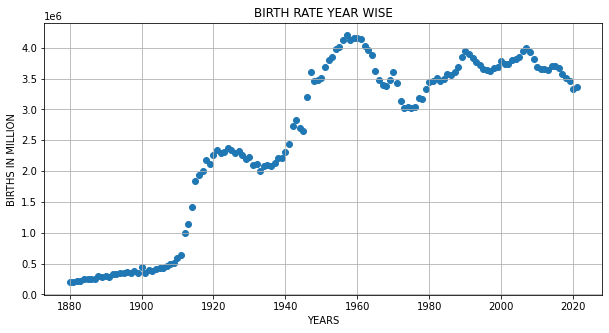

In [34]:
plt.figure(figsize=(10,5))
plt.scatter(pop.index,pop.values)
plt.xlabel('YEARS')
plt.ylabel('BIRTHS IN MILLION')
plt.title('BIRTH RATE YEAR WISE')
plt.grid()
plt.show()

### we can see births peak in between 1950s to 1960s , And then a decilne in the birth rate.
### we can see again see the decline in the present day. 

In [35]:
print('-----'*50)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
